In [1]:
#Imports
import pandas as pd
import numpy as np
from tqdm import tqdm
import copy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
path = 'datasets/turkish_dataset/turkce_cumleler_kokler_corrected_50k.csv'
df = pd.read_csv(path)
df = df.drop(columns=['id', 'text'])

X = df['roots']  # Assuming 'roots' is the text feature
y = df['label']  # Assuming 'label' is the target variable

df = df.head(2000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
cols = ['label','roots']

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

X_train = np.where(pd.isna(X_train), '', X_train)
X_test = np.where(pd.isna(X_test), '', X_test)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [4]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


def fit_model(classifierType = 'SVM'):
    classifier = None
    
    if(classifierType=="MNB"):
        classifier = MultinomialNB(alpha=0.7)
        classifier.fit(X_train_tfidf, y_train)
        
    elif(classifierType=="KNN"):
        classifier = KNeighborsClassifier(n_jobs=4)
        params = {'n_neighbors': [3,5,7,9], 'weights':['uniform', 'distance']}
        classifier = GridSearchCV(classifier, params, cv=3, n_jobs=4)
        classifier.fit(X_train_tfidf, y_train)
        classifier = classifier.best_estimator_
        
    elif(classifierType=="SVM"):
        classifier = SVC()
        # classifier = GridSearchCV(classifier, {'C':[0.001, 0.01, 0.1, 1, 10]}, cv=3, n_jobs=4)
        classifier.fit(X_train_tfidf, y_train)
        # classifier = classifier.best_estimator_
        
    elif(classifierType=="DT"):
        classifier = DecisionTreeClassifier(max_depth=800, min_samples_split=5)
        params = {'criterion':['gini','entropy']}
        classifier = GridSearchCV(classifier, params, cv=3, n_jobs=4)
        classifier.fit(X_train_tfidf, y_train)
        classifier = classifier.best_estimator_
        
    elif(classifierType=="RF"):
        classifier = RandomForestClassifier(max_depth=800, min_samples_split=5)
        params = {'n_estimators': [n for n in range(50,200,50)], 'criterion':['gini','entropy'], }
        classifier = GridSearchCV(classifier, params, cv=3, n_jobs=4)
        classifier.fit(X_train_tfidf, y_train)
        classifier = classifier.best_estimator_
        
    elif(classifierType=="LR"):
        classifier = LogisticRegression(multi_class='auto', solver='newton-cg',)
        classifier = GridSearchCV(classifier, {"C":np.logspace(-3,3,7), "penalty":["l2"]}, cv=3, n_jobs=4)
        classifier.fit(X_train_tfidf, y_train)
        classifier = classifier.best_estimator_
    return classifier


In [5]:
print('hi')
model = fit_model('LR')
print('hi2')
# Make predictions
y_pred = model.predict(X_test_tfidf)
print('hi3')

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

hi
hi2
hi3
Accuracy: 0.8909787735849056
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      8950
           1       0.93      0.83      0.88      8010

    accuracy                           0.89     16960
   macro avg       0.90      0.89      0.89     16960
weighted avg       0.89      0.89      0.89     16960



C:\Users\pahstoner\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


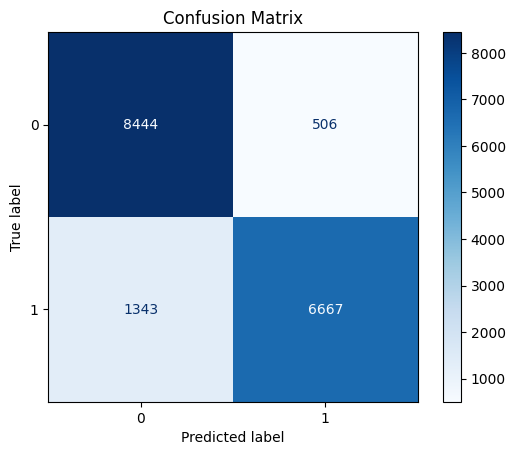

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix oluştur
cm = confusion_matrix(y_test, y_pred)

# Confusion matrix'i görselleştir
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [16]:
import pickle

# Modeli kaydet
model_name = 'knn_model'
with open(f'{model_name}.pkl', 'wb') as file:
    pickle.dump(model, file)
    
with open(f'{model_name}_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)


print("Model başarıyla kaydedildi.")

Model başarıyla kaydedildi.
